In [35]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from statsmodels.graphics.tsaplots import month_plot
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
plt.rc("figure", figsize=(15, 7))
plt.rc("font", size=13)

In [36]:
df = pd.read_csv("AirPassengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df['year'] = df['Month'].dt.year 
df['month'] = df['Month'].dt.month
df['days'] = df['Month'].dt.days_in_month
df['passengers_per_day'] = df['#Passengers']/df['days']
df.head()

,Month,#Passengers,year,month,days,passengers_per_day
0,1949-01-01,112,1949,1,31,3.612903
1,1949-02-01,118,1949,2,28,4.214286
2,1949-03-01,132,1949,3,31,4.258065
3,1949-04-01,129,1949,4,30,4.300000
4,1949-05-01,121,1949,5,31,3.903226


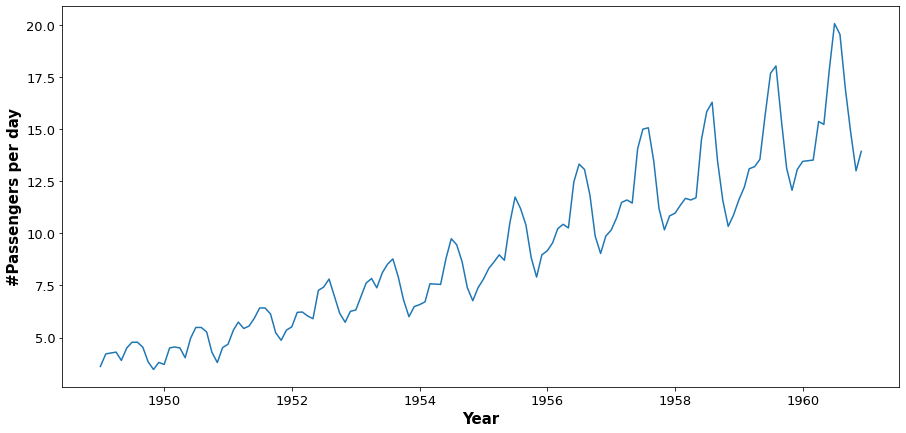

In [37]:

plt.plot(df.Month, df.passengers_per_day)

plt.xlabel('Year', fontsize=15, fontdict={'weight':'bold'})
plt.ylabel('#Passengers per day', fontsize=15, fontdict={'weight':'bold'})

plt.show()

In [38]:
df = df.set_index("Month")
df.head()

,#Passengers,year,month,days,passengers_per_day
Month,,,,,
1949-01-01,112,1949,1,31,3.612903
1949-02-01,118,1949,2,28,4.214286
1949-03-01,132,1949,3,31,4.258065
1949-04-01,129,1949,4,30,4.300000
1949-05-01,121,1949,5,31,3.903226


In [13]:
fit = sm.tsa.STL(df.passengers_per_day).fit()

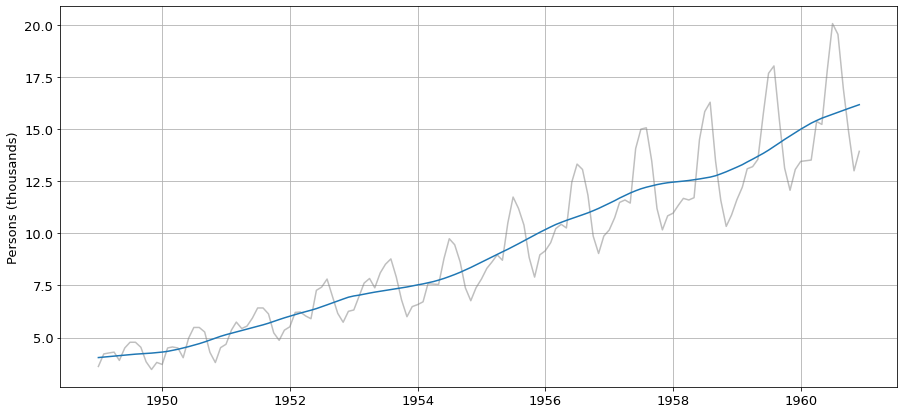

In [40]:

plt.plot(df.passengers_per_day, color='.5', alpha=.5)
plt.plot(fit.trend)
plt.ylabel('Persons (thousands)')
plt.grid()
plt.show()

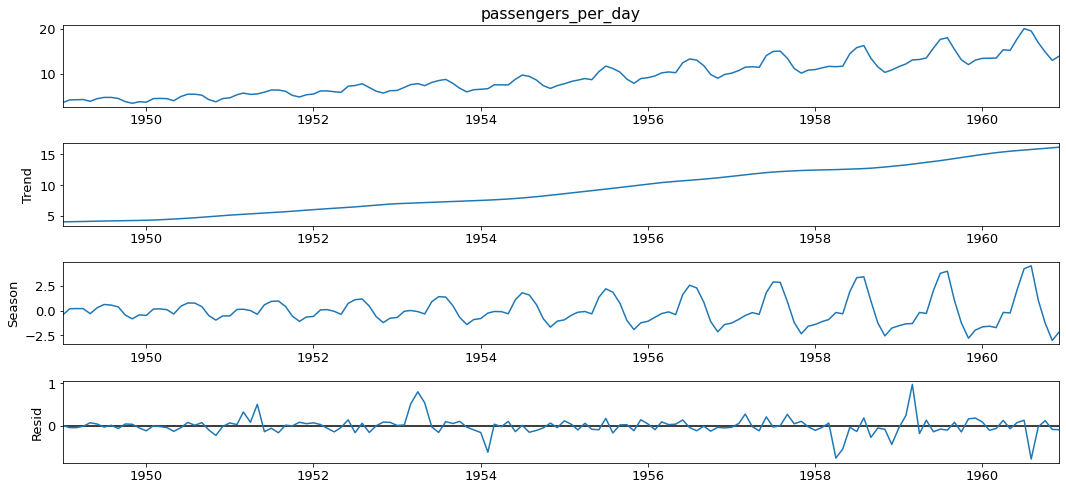

In [44]:
fit = sm.tsa.STL(df.passengers_per_day, robust=True, trend=15).fit()
fig = fit.plot()
ax = fig.axes[-1]
ax.lines[0].set(linestyle='-', marker=None)
plt.show()